# What is Machine Learning?
* It's teaching machines how to learn. You input the data while the machine writes the function/model/algorithm, identifies patterns from the data then makes predictions.

## Scikit-Learn (sklearn) Workflow
* Get the data ready
* Pick a model that suits your problem
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve the model through experimentation
* Save and reload your trained model

## 0. Getting the data ready

In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to show the plots in d notebook
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#create a variable (features matrix) to store other columns except target which will be designated to a different variable
    # create an x variable(drop every other column except target)
x = heart_disease.drop('target', axis=1)
    # create a y variable to store target
y = heart_disease['target']

In [4]:
#2. choose the right model and hyperparameters
    #using random forest
from sklearn.ensemble import RandomForestClassifier
#instantiate the classifier
clf = RandomForestClassifier()
#keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split
#allocate the testing and trainign data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
# getting rid of warnings or other warning-related ops
import warnings
warnings.filterwarnings('ignore')

In [7]:
#show scikit-learn version
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\this\Desktop\allntbks\testnb1\env\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.1
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: None
       pandas: 1.3.4
   matplotlib: 3.5.0
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [8]:
#find the patterns in the training data by fitting the data to the model
clf.fit(x_train, y_train);

In [9]:
#make a prediction
# y_label = clf.predict(np.array([1,2,4,5,6,0,9]))

In [10]:
# because x_train looks nothing like the numpy array given, check x_test, see if it fits then use it if it does
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3


In [11]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [12]:
y_predicts = clf.predict(x_test);
y_predicts

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [13]:
#the outcome of 0s and 1s looks weird. however the next step will put it to the test

In [14]:
#4. evaluate the model on the learning and training data
clf.score(x_train, y_train)
#the above returns the mean accuracy on the given test data

1.0

In [15]:
#cross evaluating the model with the test data it hasn't seen before (x and y axis data)
clf.score(x_test, y_test)

0.8241758241758241

In [16]:
#what above outcome indicates is that the algorithm got 76.9% out of a 100% correct which is good in spite never being exposed to the x_test and y_test data before

In [17]:
#further evaluation with different metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# now compare the y_test with the y_preds(prediction)
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [18]:
confusion_matrix(y_test, y_predicts)

array([[33,  9],
       [ 7, 42]], dtype=int64)

In [19]:
accuracy_score(y_test, y_predicts)

0.8241758241758241

In [20]:
#5. improve the model
# try different amounts of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%')
    print("")

Trying model with 10 estimators
Model accuracy on test set: 69.23%

Trying model with 20 estimators
Model accuracy on test set: 83.52%

Trying model with 30 estimators
Model accuracy on test set: 82.42%

Trying model with 40 estimators
Model accuracy on test set: 81.32%

Trying model with 50 estimators
Model accuracy on test set: 83.52%

Trying model with 60 estimators
Model accuracy on test set: 79.12%

Trying model with 70 estimators
Model accuracy on test set: 80.22%

Trying model with 80 estimators
Model accuracy on test set: 83.52%

Trying model with 90 estimators
Model accuracy on test set: 82.42%



In [21]:
#6. save the model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [22]:
#load the saved model
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))

#run the model
loaded_model.score(x_test,y_test)

0.8241758241758241

## An Indepth Look into Scikit_learn's Workfolow

## 1. Getting Data Ready to be Used with Machine Learning

### Three things to do here are:
* split the data into features & labels ('x' & 'y')
* Filling (aka imputing) or disregarding missing values
* Converting non-numerical values to numerical values AKA feature encoding

In [23]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
# features
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
# labels
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# split data into training and test subsets from the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
#the result below shows that 80% of the dataset has been allocated to the training subsets
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

### 1. Import a new Dataset and Make Sure it's all Numerical

In [28]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

#### Before you can write a machine learning model, you've to convert your dataset to numbers

In [30]:
# split into features and labels
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [31]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [32]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [33]:
# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 4), (300, 4), (700,), (300,))

In [34]:
# Note: x test and train must be side by side for the model to run successfully

In [42]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#fit: train the model
model.fit(x_train, y_train)
#score: test the model
model.score(x_test, y_test)

0.3235867221569877

In [43]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [44]:
# convert strings to numbers so the model can understand it
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder='passthrough')

# transform the x subset
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [45]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [46]:
# ColumnTransformer accepts two arguments:
    # a list containing a tuple of a string referencing the variable hodling OneHotEncoder, the variable itself and the subset to be converted to binary form by OneHotEncoder
    #outside the list: a command of what is to happen to the unspecified subset
    
#every four digits represent the name of a heading
# all colours are converted to RGB values
# pd.DataFrame(transformed_x)

In [47]:
# another way to convert a subset into binary format is with the use of the get_dummies(dataset[['col_names']]) method
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [48]:
# refit the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

In [49]:
# x_test.shape, x_train.shape, y_train.shape, y_test.shape

In [50]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


##1.2 How to Handle Missing Data
* Fill them with some value AKA imputation
* Remove the samples with missing data

In [51]:
#import the dataset
missing_car_sales_data = pd.read_csv('datasets/car-sales-extended-missing-data.csv')
missing_car_sales_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
#to find missing values
missing_car_sales_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing data witg pandas

In [53]:
# fill Make column
missing_car_sales_data['Make'].fillna('Missing', inplace=True)

#fill Colour column
missing_car_sales_data['Colour'].fillna('Missing', inplace=True)

#fill missing Odometer
missing_car_sales_data['Odometer (KM)'].fillna(missing_car_sales_data['Odometer (KM)'].mean(), inplace=True)

#fill Doors: the average car has 4 doors
missing_car_sales_data['Doors'].fillna(4, inplace=True)

#fill missing Price
# missing_car_sales_data['Price'].fillna(missing_car_sales_data['Price'].mean(), inplace=True)

# check missing values
missing_car_sales_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [54]:
#remove rows with missing price values
missing_car_sales_data.dropna(inplace=True)

In [55]:
missing_car_sales_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [56]:
#create subsets
x = missing_car_sales_data.drop('Price', axis=1)
y = missing_car_sales_data['Price']

In [57]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,Missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [58]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [59]:
#convert the dataset to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot_enc = OneHotEncoder()
#transform categorical_features to 0s nd 1s using OneHotEncoder
transformer = ColumnTransformer([('one_hot_enc',
                               one_hot_enc,
                               categorical_features)],
                               remainder = 'passthrough')

transformed_x = transformer.fit_transform(missing_car_sales_data)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [60]:
#option 2: fill missing values with scikit-learn

In [61]:
#reinstantiate the missing_car_sales_data dataset
missing_car_sales_data1 = pd.read_csv('datasets/car-sales-extended-missing-data.csv')
missing_car_sales_data1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
#look for missing values
missing_car_sales_data1.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:

#drop rows with missing data
missing_car_sales_data1.dropna(subset=['Price'], inplace=True)
missing_car_sales_data1.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# split into x and y
x = missing_car_sales_data1.drop('Price', axis=1)
y = missing_car_sales_data1['Price']

In [65]:


x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [66]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [67]:
#deal with missing data with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with "missing and numerical values with mean"
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_importer = SimpleImputer(strategy='mean')

#define columns
categorical_features = ['Make', 'Colour']
door_feature = ['Doors']
numerical_features = ['Odometer (KM)']

#create an imputer (this will fill in missing values: columntransformer)
imputer = ColumnTransformer([
    ('categorical_imputer', categorical_imputer, categorical_features),
    ('door_imputer', door_imputer, door_feature),
    ('numerical_imputer', numerical_importer, numerical_features)
])

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [68]:
missing_car_sales_data1.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [69]:
# create a new variable to hold the filled dataset
filled_car_sales_data = pd.DataFrame(filled_x,
                                    columns=['Make', 'Colour', 'Odometer (KM)', 'Doors'])
filled_car_sales_data

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [70]:
filled_car_sales_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [71]:
#convert the new dataset to numbers using OneHotEncoder and ColumnTransformer
categorical_features = ['Make', 'Colour', 'Doors']
one_hot_enc = OneHotEncoder()
transformer = ColumnTransformer([('one_hot_enc',
                                 one_hot_enc,
                                 categorical_features)],
                                 remainder='passthrough')

transformed_x = transformer.fit_transform(filled_car_sales_data)
transformed_x

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [72]:
#Now fit a model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

#setup the model
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.044955128011236356

In [73]:
#save the model with pickle
pickle.dump(model, open('random_forest_regressor_model_1.pkl', 'wb'))

## Choosing the Right Model/Algorithm/Estimator for Your Problem

### 2. Some things worth knowing are:
* scikit-learn refers to models/algorithms as estimators
        ** Estimators are broken into classifiers and regressors
            *** Classification problem: predicting a category (such as who had or didnt have a heart disease  from the previous model that was worked on). It's sometimes denoted as 'clf' (classifier) which is used as a classification estimator
            *** Regression Problem: used for predicting numbers (price of a car)
            
* If you're confused as to which model best suits your problem, refer to this scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* To get practice datasets, go to : sklearn datasets on google

### 2.1 Picking a machine learning model for a regression problem

#### The dataset used in this exercise was gotten from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [74]:
## The goal of this project is to use the other data to predict the MedHouseval
#get california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [75]:
# turn the dataset to a dataframe: use the dictionary's key and column to frame it
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
# get the target_names

housing_df['MedHouseVal'] = housing['target']
housing_df['Target'] = housing_df['MedHouseVal']
housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [77]:





#import the algorithm
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate and fit the model to the training set
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

0.5758549611440126

In [78]:
# using a different model for the same dataset
from sklearn.linear_model import ElasticNet

#instantiate the model
Elnet_model = ElasticNet()

#create the data
x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the data to the model
Elnet_model.fit(x_train, y_train)
Elnet_model.score(x_test, y_test)

0.415804589155481

In [79]:

#trying Lasso
from sklearn.linear_model import Lasso

las = Lasso()

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

las.fit(x_train, y_train)
las.score(x_test, y_test)

0.28448450572568373

In [80]:
# trying the Support Vector Regression Model
from sklearn.svm import SVR

svr = SVR()

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.2)

svr.fit(x_train, y_train)
svr.score(x_test, y_test)

-0.028071557075286524

In [81]:
#using RandomForestRegressor: a type of ensemble model (an ensemble model is a combination of smaller models to make one prediction)
# a Random Forest is a combination of multiple Decision Trees whose branches are split into YES?NO
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfr_model.fit(x_train, y_train)
rfr_model.score(x_test, y_test)

0.8052016470448884





### 2.2 Picking an ml model for a classification model

In [82]:
#getting a dataset that u used earlier
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
# going by the map, the LinearSVC is the best bet
from sklearn.svm import LinearSVC

svc = LinearSVC()

np.random.seed(42)

#make the data
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fit the model to the train sets
svc.fit(x_train,y_train)
svc.score(x_test, y_test)

0.8688524590163934

In [84]:
#using the Gaussian naive_bayes model
from sklearn.naive_bayes import GaussianNB

clf_gaussian = GaussianNB()
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3)

clf_gaussian.fit(x_train, y_train)
clf_gaussian.score(x_test, y_test)

0.8461538461538461

In [85]:
#trying out the multinomialnb model
# from sklearn.naive_bayes import MultinomialNB

# clf_multi = MultinomialNB()

# x = heart_disease.drop('target', axis=1)
# y = heart_disease['target']

# x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=1)

# clf_multi.fit(x_train, y_train)
# clf_multi.score(x_test, y_test)

In [86]:
# using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3)

clf_rfc.fit(x_train, y_train)
clf_rfc.score(x_test, y_test)

0.7802197802197802

Note the following:
    If you have structured data [in a table], use ensemble methods
    If you have unstructured data, use deep learning hor transfer learning

In [87]:
# # using kneighborsclassifier
# from sklearn.neighbors import KNeighborsClassifier

# clf_knc = KNeighborsClassifier()

# x = heart_disease.drop('target', axis=1)
# y = heart_disease['target']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# clf_knc.fit(x_train, y_train)
# clf_knc.score(x_test, y_test)

In [88]:
# Fit the model/algorithm and use it to make predictions on out data

#### 3. Usibng a Model to Make Predictions

There are 2 ways to make predictions namely:
1. predict()
2. predict_proba()

In [89]:

x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2


In [90]:

# Use a trained model to make predictions: using clf_rfc.
clf_rfc.predict(x_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [91]:
# y_test is the truth label
np.array([y_test])

array([[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0]], dtype=int64)

In [92]:
# compare predictions with truth label to evaluate the authenticity of the label
y_preds = clf_rfc.predict(x_test)
#now compare the truth (ground truth) label
np.mean(y_preds == y_test)

0.7802197802197802

In [93]:
# another way to evaluate this is by importing accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7802197802197802

##### Make predictions with predict_proba() function
predict_proba() returns probabilities of a classification model

In [94]:
clf_rfc.predict(x_test[:7])

array([0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [95]:
clf_rfc.predict_proba(x_test[:7])

array([[0.68, 0.32],
       [0.18, 0.82],
       [0.21, 0.79],
       [0.49, 0.51],
       [0.91, 0.09],
       [0.57, 0.43],
       [0.64, 0.36]])

In [96]:
# setting up a rfr model for the housing_df dataset
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fit the train set to the model
rfr_model.fit(x_train, y_train)

#make predictions
y_preds = rfr_model.predict(x_test)

In [97]:
#now run the the function
y_preds[:10]

array([1.30011  , 2.6720414, 1.76655  , 1.5949503, 3.2178401, 3.5782305,
       1.9031701, 0.52237  , 1.30309  , 3.5714303])

In [98]:
np.array(y_test[:10])

array([1.661, 3.708, 0.683, 2.427, 3.14 , 3.912, 1.125, 0.503, 0.982,
       3.599])

In [99]:
#what the result of the code below means is that there is a prediction per test data
len(y_preds), len(y_test)

(4128, 4128)

In [100]:
# mean absolute error: the average difference between the predicted value and the true value
#compare the prediction to the truth -> evaluation
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.33721329001938005

what the above value means is that there's a difference of the figures above (average) between what was predicted by my model and the actual values in the ground label

## 4. Evaluating a Machine Learning Model
 
There are three ways to evaluate an ML model:
    1. Estimator's built-in 'score()' method
    2. The 'Scoring' parameter
    3. Problem-specific metric functions
    
The three methods can be found at the following address: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a Model with the Score Method

In [101]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rfc = RandomForestClassifier()

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8524590163934426

In [102]:
# using the score method on a regression problem
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8095334567787089

### Evaluating a Machine Learning Model (Score Validation)

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfc = RandomForestClassifier()

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc.fit(x_train, y_train)

#using the score method
rfc.score(x_test, y_test)

0.8524590163934426

In [104]:
#evaluating using cross_val_score
cross_val_score(rfc, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [105]:
# cross validation tests five folds of the same model and generates different outcomes of five floats in an array
# you could have it carry out tests in more or less than 5 folds
cross_val_score(rfc, x, y, cv=7)

array([0.84090909, 0.81818182, 0.88372093, 0.8372093 , 0.81395349,
       0.79069767, 0.76744186])

In [106]:
# take the mean value of cross_val_score
np.random.seed(42)

rfc_single = rfc.score(x_test, y_test)

#calculate the mean of cvs
rfc_cross = np.mean(cross_val_score(rfc, x, y))

#compare the value of both
rfc_single, rfc_cross

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification Model Evaluation Metrics

Below are metrics that will be delved into here:

1. accuracy
2. Area under ROC curve
3. confusion matrix
4. classification report

** Accuracy

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rfc = RandomForestClassifier()

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# since a cross_val_score is what's needed, no need to fit the data
cvs = cross_val_score(rfc, x, y)

In [108]:
#get the mean value of cvs
np.mean(cvs)

0.8215300546448088

In [109]:
#print it in an understandable way
# what output below means it that my model, using this model on the dataset, will make 8 out of 10 correct predictions per time
print(f'Heart Disease Classifier Cross-validated Accuracy: {np.mean(cvs) * 100:.2f}%')

Heart Disease Classifier Cross-validated Accuracy: 82.15%


** Area Under the Receiver Operating Characteristic Curve (AUC/ROC)

Area Under Curve (AUC) or ROC Curve (ROC) are used interchangeably to mean a comparison of a model's true positive rate (TPR) VS a model's false positive rate (FPR).

* True positive: Model predicts 1 while actual value is 1
* False positive: model predicts 1 while actual value is 0
* True negative: model predicts 0 while actual is 0
* False negative: model predicts 0  while actual is 1

In [110]:
# import it using sckikit learn's metricsw library
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fit the classifier
rfc.fit(x_train, y_train)

#make predictions with probabilities
y_probs = rfc.predict_proba(x_test)

y_probs[:12]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01],
       [0.79, 0.21],
       [0.75, 0.25]])

In [111]:
heart_disease[:12]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [112]:
# I only want to get predictions on index 1 (positive)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:12]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01, 0.21,
       0.25])

In [113]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [114]:
#check the fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

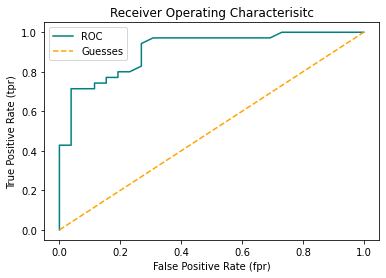

In [115]:
# create a function for creating ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    this function plots a ROC curve with the True Positive Rate (TPR) and False Positive Rate (fpr)
    """
    #plot the a ROC curve
    plt.plot(fpr, tpr, color='teal', label='ROC')
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='orange', linestyle='--', label='Guesses')
    
    #customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [116]:
#the next thing is to find where the most ideal curve will go by importing and using roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

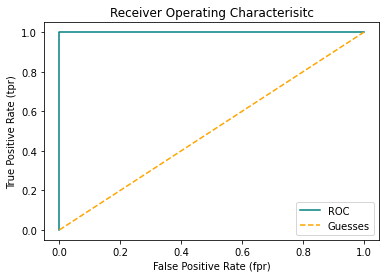

In [117]:
#a perfect roc curve of 1 can be plotted by using a single value
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [118]:
#getting a perfect auc score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

A confusion matrix is a way to compare the labels a model predicts with the actual labels it is supposed to predict.

In other words, it gives you an idea of where the model is getting confused

In [119]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [120]:
#visualize the confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,8,27


In [121]:
#when you add everything in that table, it'll equal 61 whic is the total of the x_test
24+2+35, len(x_test)

(61, 61)

<AxesSubplot:>

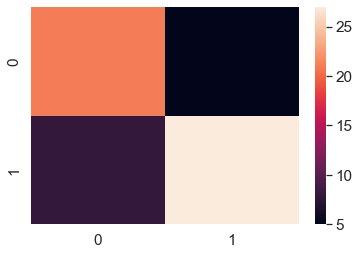

In [122]:
#make my confusion matrix more visible with seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.4)

#create a confusion matrix
conf_matx = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_matx)

##### How to install a conda package into the current environment from jn

* import sys (refers to your machine)
* !conda install --yes --prefix {sys.prefix} seaborn

##### creating a confusion matrix using scikit-learn
To check what version of sklearn you've installed: https://www.kite.com/python/answers/how-to-check-the-versions-of-nltk-and-scikit-learn-in-python#:~:text=3.4.3-,Use%20sklearn.,current%20version%20of%20scikit%2Dlearn%20.

In [123]:
import sklearn

sklearn.__version__

'1.0.1'

In [124]:
rfc

RandomForestClassifier()

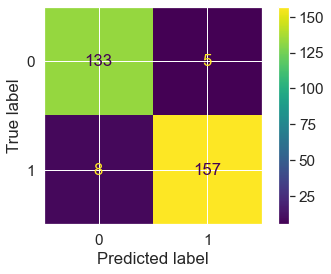

In [125]:
## import confusionmatrixdisplay
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc, x, y);

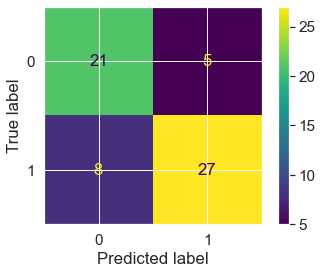

In [126]:
#using predictions which requires a ready made prediction
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

##### Classification Report

In [131]:
from sklearn.metrics import classification_report

#use classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [133]:
# an example of why precision and recall are valuable
has_disease = np.zeros(10000)

# has the disease
has_disease[0] = 1

# model predicts everything as negative
disease_preds = np.zeros(10000)

#tabulate the and evaluate the prediction
pd.DataFrame(classification_report(has_disease,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
